In [63]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from torch import nn
from torch.utils.data import random_split, TensorDataset, Dataset, DataLoader

In [64]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

In [65]:
!unzip -d house-prices-advanced-regression-techniques house-prices-advanced-regression-techniques.zip

In [66]:
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [67]:
print(train_data.shape, test_data.shape)

(1460, 81) (1459, 80)


In [68]:
invalid_cols = train_data.columns[train_data.isnull().sum() > len(train_data) * 0.2]
invalid_cols

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [69]:
test_data.columns[test_data.isnull().sum() > len(test_data) * 0.2]

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [70]:
train_data[invalid_cols].head()

,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,NaN,NaN,NaN,NaN,NaN
1,NaN,TA,NaN,NaN,NaN
2,NaN,TA,NaN,NaN,NaN
3,NaN,Gd,NaN,NaN,NaN
4,NaN,TA,NaN,NaN,NaN


In [71]:
train_data.drop(columns=invalid_cols, inplace=True)

In [72]:
columns = 'ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond'.split(',')
columns

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'HeatingQC',
 'KitchenQual',
 'GarageQual',
 'GarageCond']

In [73]:
levels = 'NA,Po,Fa,TA,Gd,Ex'.split(',')
levels

['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

In [74]:
train_data[columns] = train_data[columns].replace(levels, list(range(6)))
test_data[columns] = test_data[columns].replace(levels, list(range(6)))
train_data[columns]

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond
0,4,3,4.0,3.0,5,4,3.0,3.0
1,3,3,4.0,3.0,5,3,3.0,3.0
2,4,3,4.0,3.0,5,4,3.0,3.0
3,3,3,3.0,4.0,4,4,3.0,3.0
4,4,3,4.0,3.0,5,4,3.0,3.0
...,...,...,...,...,...,...,...,...
1455,3,3,4.0,3.0,5,3,3.0,3.0
1456,3,3,4.0,3.0,3,3,3.0,3.0
1457,5,4,3.0,4.0,5,4,3.0,3.0
1458,3,3,3.0,3.0,4,4,3.0,3.0


In [75]:
levels = 'NA,No,Mn,Av,Gd'.split(',')
levels

['NA', 'No', 'Mn', 'Av', 'Gd']

In [76]:
train_data['BsmtExposure'] = train_data['BsmtExposure'].replace(levels, list(range(5)))
test_data['BsmtExposure'] = test_data['BsmtExposure'].replace(levels, list(range(5)))
train_data['BsmtExposure']

0       1.0
1       4.0
2       2.0
3       1.0
4       3.0
       ... 
1455    1.0
1456    1.0
1457    1.0
1458    2.0
1459    1.0
Name: BsmtExposure, Length: 1460, dtype: float64

In [77]:
levels = 'NA,Unf,LwQ,Rec,BLQ,ALQ,GLQ'.split(',')
levels

['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']

In [78]:
columns = 'BsmtFinType1,BsmtFinType2'.split(',')
columns

['BsmtFinType1', 'BsmtFinType2']

In [79]:
train_data[columns] = train_data[columns].replace(levels, list(range(7)))
test_data[columns] = test_data[columns].replace(levels, list(range(7)))
train_data[columns]

,BsmtFinType1,BsmtFinType2
0,6.0,1.0
1,5.0,1.0
2,6.0,1.0
3,5.0,1.0
4,6.0,1.0
...,...,...
1455,1.0,1.0
1456,5.0,3.0
1457,6.0,1.0
1458,6.0,3.0


In [80]:
train_data['CentralAir'] = train_data['CentralAir'].replace(['N','Y'], [0, 1])
test_data['CentralAir'] = test_data['CentralAir'].replace(['N','Y'], [0, 1])
train_data['CentralAir']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: CentralAir, Length: 1460, dtype: int64

In [81]:
levels = 'NA,Unf,RFn,Fin'.split(',')
levels

['NA', 'Unf', 'RFn', 'Fin']

In [82]:
train_data['GarageFinish'] = train_data['GarageFinish'].replace(levels, list(range(4)))
test_data['GarageFinish'] = test_data['GarageFinish'].replace(levels, list(range(4)))
train_data['GarageFinish']

0       2.0
1       2.0
2       2.0
3       1.0
4       2.0
       ... 
1455    2.0
1456    1.0
1457    2.0
1458    1.0
1459    3.0
Name: GarageFinish, Length: 1460, dtype: float64

In [83]:
levels = 'ELO,NoSeWa,NoSewr,AllPub'.split(',')
levels

['ELO', 'NoSeWa', 'NoSewr', 'AllPub']

In [84]:
train_data['Utilities'] = train_data['Utilities'].replace(levels, [1,2,3,4])
test_data['Utilities'] = test_data['Utilities'].replace(levels, [1,2,3,4])
train_data['Utilities']

0       4
1       4
2       4
3       4
4       4
       ..
1455    4
1456    4
1457    4
1458    4
1459    4
Name: Utilities, Length: 1460, dtype: int64

In [85]:
levels = 'Sev,Mod,Gtl'.split(',')
levels

['Sev', 'Mod', 'Gtl']

In [86]:
train_data['LandSlope'] = train_data['LandSlope'].replace(levels, [1,2,3])
test_data['LandSlope'] = test_data['LandSlope'].replace(levels, [1,2,3])
train_data['LandSlope']

0       3
1       3
2       3
3       3
4       3
       ..
1455    3
1456    3
1457    3
1458    3
1459    3
Name: LandSlope, Length: 1460, dtype: int64

In [87]:
levels = 'Sal,Sev,Maj2,Maj1,Mod,Min2,Min1,Typ'.split(',')
levels

['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']

In [88]:
train_data['Functional'] = train_data['Functional'].replace(levels, list(range(1,9)))
test_data['Functional'] = test_data['Functional'].replace(levels, list(range(1,9)))
train_data['Functional']

0       8
1       8
2       8
3       8
4       8
       ..
1455    8
1456    7
1457    8
1458    8
1459    8
Name: Functional, Length: 1460, dtype: int64

In [89]:
levels = 'Mix,FuseP,FuseF,FuseA,SBrkr'.split(',')
levels

['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']

In [90]:
train_data['Electrical'] = train_data['Electrical'].replace(levels, list(range(1,6)))
test_data['Electrical'] = test_data['Electrical'].replace(levels, list(range(1,6)))
train_data['Electrical']

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
1455    5.0
1456    5.0
1457    5.0
1458    4.0
1459    5.0
Name: Electrical, Length: 1460, dtype: float64

In [91]:
pd.set_option('display.max_columns', None)

In [92]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,4,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4.0,3.0,1.0,6.0,706,1.0,0,150,856,GasA,5,1,5.0,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,Attchd,2003.0,2.0,2,548,3.0,3.0,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,4,FR2,3,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,GasA,5,1,5.0,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,Attchd,1976.0,2.0,2,460,3.0,3.0,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,4,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4.0,3.0,2.0,6.0,486,1.0,0,434,920,GasA,5,1,5.0,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,Attchd,2001.0,2.0,2,608,3.0,3.0,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,4,Corner,3,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3.0,4.0,1.0,5.0,216,1.0,0,540,756,GasA,4,1,5.0,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,Detchd,1998.0,1.0,3,642,3.0,3.0,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,4,FR2,3,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4.0,3.0,3.0,6.0,655,1.0,0,490,1145,GasA,5,1,5.0,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,Attchd,2000.0,2.0,3,836,3.0,3.0,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [93]:
corr_price = train_data.corrwith(train_data['SalePrice']).sort_values(ascending=False)
corr_price

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
BsmtQual         0.644019
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
GarageFinish     0.513105
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
HeatingQC        0.427649
BsmtFinSF1       0.386420
BsmtExposure     0.352958
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
BsmtFinType1     0.277436
LotArea          0.263843
CentralAir       0.251328
Electrical       0.233590
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
BsmtCond         0.160658
GarageQual       0.156693
GarageCond       0.125013
ScreenPorch      0.111447
Functional       0.107619
PoolArea    

In [94]:
candidate_columns = corr_price[corr_price > 0.55].index.to_list()
candidate_columns

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'BsmtQual',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath']

In [95]:
corr_price[corr_price > 0.6].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'BsmtQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF'],
      dtype='object')

In [96]:
train_data[candidate_columns].describe()

,SalePrice,OverallQual,GrLivArea,ExterQual,KitchenQual,BsmtQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath
count,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1423.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,3.39589,3.511644,3.579761,1.767123,472.980137,1057.429452,1162.626712,1.565068
std,79442.502883,1.382997,525.480383,0.57428,0.663760,0.680602,0.747315,213.804841,438.705324,386.587738,0.550916
min,34900.000000,1.000000,334.000000,2.00000,2.000000,2.000000,0.000000,0.000000,0.000000,334.000000,0.000000
25%,129975.000000,5.000000,1129.500000,3.00000,3.000000,3.000000,1.000000,334.500000,795.750000,882.000000,1.000000
50%,163000.000000,6.000000,1464.000000,3.00000,3.000000,4.000000,2.000000,480.000000,991.500000,1087.000000,2.000000
75%,214000.000000,7.000000,1776.750000,4.00000,4.000000,4.000000,2.000000,576.000000,1298.250000,1391.250000,2.000000
max,755000.000000,10.000000,5642.000000,5.00000,5.000000,5.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000


In [97]:
sns.set(rc={'figure.figsize':(14,8)})

<AxesSubplot:>

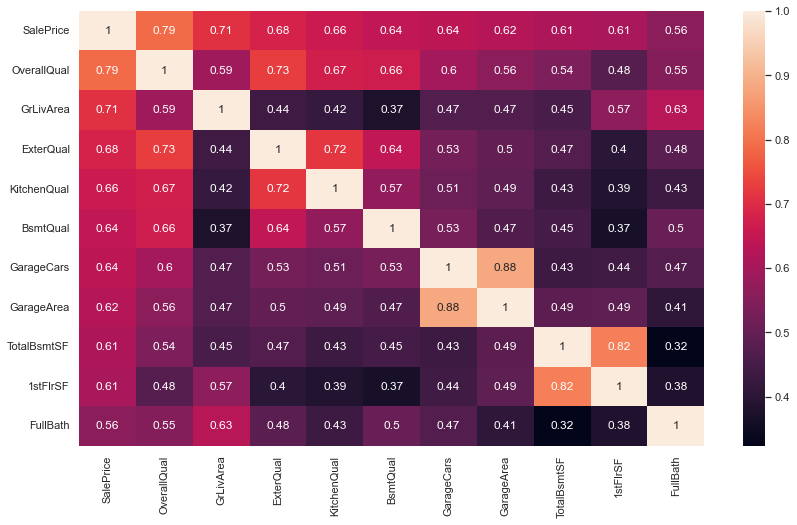

In [98]:
sns.heatmap(train_data[candidate_columns].corr(), annot=True)

In [99]:
train_data[candidate_columns].dtypes

SalePrice        int64
OverallQual      int64
GrLivArea        int64
ExterQual        int64
KitchenQual      int64
BsmtQual       float64
GarageCars       int64
GarageArea       int64
TotalBsmtSF      int64
1stFlrSF         int64
FullBath         int64
dtype: object

In [100]:
train_data[candidate_columns].isna().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
ExterQual       0
KitchenQual     0
BsmtQual       37
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
dtype: int64

In [101]:
is_obj = train_data.dtypes == object

In [102]:
obj_cols = train_data.columns[is_obj]
obj_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'GarageType', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [103]:
train_data[obj_cols].apply(pd.unique)

MSZoning                                 [RL, RM, C (all), FV, RH]
Street                                                [Pave, Grvl]
LotShape                                      [Reg, IR1, IR2, IR3]
LandContour                                   [Lvl, Bnk, Low, HLS]
LotConfig                      [Inside, FR2, Corner, CulDSac, FR3]
Neighborhood     [CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...
Condition1       [Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...
Condition2       [Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ...
BldgType                     [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
HouseStyle       [2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...
RoofStyle               [Gable, Hip, Gambrel, Mansard, Flat, Shed]
RoofMatl         [CompShg, WdShngl, Metal, WdShake, Membran, Ta...
Exterior1st      [VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ...
Exterior2nd      [VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, ...
MasVnrType                     [BrkFace, None, Stone, BrkCmn, 

In [104]:
train_data[obj_cols].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
LotConfig         5
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
Foundation        6
Heating           6
GarageType        6
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [105]:
train_data['MeanPrice'] = (train_data['SalePrice'] / train_data['GrLivArea']).astype(np.float32)
train_data['MeanPrice'].head()

0    121.929825
1    143.819336
2    125.139977
3     81.537567
4    113.739761
Name: MeanPrice, dtype: float32

In [106]:
d = {}
for obj_col in obj_cols:
    d[obj_col] = train_data.groupby(obj_col)['MeanPrice'].median().std()
pd.Series(d).sort_values(ascending=False)

RoofMatl         52.701313
MSZoning         28.127983
Exterior1st      27.310759
SaleType         26.161406
HouseStyle       25.186733
Condition2       24.536970
Exterior2nd      24.235601
BldgType         24.220791
SaleCondition    23.317272
Heating          21.574640
Neighborhood     21.185284
LandContour      18.833158
PavedDrive       18.769468
MasVnrType       17.910622
Foundation       17.435640
GarageType       15.193862
RoofStyle        13.785896
Condition1       13.648312
LotShape         10.316780
LotConfig         8.605024
Street            2.389782
dtype: float64

In [107]:
train_data['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [108]:
train_data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [109]:
train_data['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [110]:
train_data['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [111]:
train_data['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [112]:
test_data['HouseStyle'].isna().sum()

0

In [113]:
train_data = pd.get_dummies(train_data, columns=['HouseStyle'])
test_data  = pd.get_dummies(test_data, columns=['HouseStyle'])
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,4.0,Inside,3,NAmes,Feedr,Norm,1Fam,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3.0,3.0,1.0,3.0,468.0,2.0,144.0,270.0,882.0,GasA,3,1,5,896,0,0,896,0.0,0.0,1,0,2,1,3.0,5,8.0,0,NaN,Attchd,1961.0,1.0,1.0,730.0,3.0,3.0,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0,0,1,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,4.0,Corner,3,NAmes,Norm,Norm,1Fam,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,3,3,CBlock,3.0,3.0,1.0,5.0,923.0,1.0,0.0,406.0,1329.0,GasA,3,1,5,1329,0,0,1329,0.0,0.0,1,1,3,1,4.0,6,8.0,0,NaN,Attchd,1958.0,1.0,1.0,312.0,3.0,3.0,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0,0,1,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,4.0,Inside,3,Gilbert,Norm,Norm,1Fam,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,1.0,6.0,791.0,1.0,0.0,137.0,928.0,GasA,4,1,5,928,701,0,1629,0.0,0.0,2,1,3,1,3.0,6,8.0,1,TA,Attchd,1997.0,3.0,2.0,482.0,3.0,3.0,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0,0,0,0,1,0,0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,4.0,Inside,3,Gilbert,Norm,Norm,1Fam,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,3,3,PConc,3.0,3.0,1.0,6.0,602.0,1.0,0.0,324.0,926.0,GasA,5,1,5,926,678,0,1604,0.0,0.0,2,1,3,1,4.0,7,8.0,1,Gd,Attchd,1998.0,3.0,2.0,470.0,3.0,3.0,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0,0,0,0,1,0,0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,4.0,Inside,3,StoneBr,Norm,Norm,TwnhsE,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,PConc,4.0,3.0,1.0,5.0,263.0,1.0,0.0,1017.0,1280.0,GasA,5,1,5,1280,0,0,1280,0.0,0.0,2,0,2,1,4.0,5,8.0,0,NaN,Attchd,1992.0,2.0,2.0,506.0,3.0,3.0,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,4.0,Inside,3,MeadowV,Norm,Norm,Twnhs,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3.0,3.0,1.0,1.0,0.0,1.0,0.0,546.0,546.0,GasA,4,1,5,546,546,0,1092,0.0,0.0,1,1,3,1,3.0,5,8.0,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0,0,0,0,1,0,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,4.0,Inside,3,MeadowV,Norm,Norm,TwnhsE,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3.0,3.0,1.0,3.0,252.0,1.0,0.0,294.0,546.0,GasA,3,1,5,546,546,0,1092,0.0,0.0,1,1,3,1,3.0,6,8.0,0,NaN,CarPort,1970.0,1.0,1.0,286.0,3.0,3.0,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0,0,0,0,1,0,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,4.0,Inside,3,Mitchel,Norm,Norm,1Fam,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3.0,3.0,1.0,5.0,1224.0,1.0,0.0,0.0,1224.0,GasA,5,1,5,1224,0,0,1224,1.0,0.0,1,0,4,1,3.0,7,8.0,1,TA,Detchd,1960.0,1.0,2.0,576.0,3.0,3.0,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,200

In [114]:
candidate_columns.remove('SalePrice')
candidate_columns

['OverallQual',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'BsmtQual',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath']

In [115]:
z_score = lambda x: (x - x.mean()) / x.std()

In [116]:
train_data[candidate_columns] = train_data[candidate_columns].apply(z_score)
test_data[candidate_columns] = test_data[candidate_columns].apply(z_score)

In [117]:
train_data[candidate_columns].isna().sum()

OverallQual     0
GrLivArea       0
ExterQual       0
KitchenQual     0
BsmtQual       37
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
dtype: int64

In [118]:
test_data[candidate_columns].isna().sum()

OverallQual     0
GrLivArea       0
ExterQual       0
KitchenQual     1
BsmtQual       44
GarageCars      1
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
dtype: int64

In [119]:
train_data[candidate_columns] = train_data[candidate_columns].fillna(0)
test_data[candidate_columns] = test_data[candidate_columns].fillna(0)

In [120]:
train_data[candidate_columns].head()

,OverallQual,GrLivArea,ExterQual,KitchenQual,BsmtQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath
0,0.651256,0.370207,1.051942,0.735742,0.617452,0.311618,0.350880,-0.459145,-0.793162,0.789470
1,-0.071812,-0.482347,-0.689368,-0.770827,0.617452,0.311618,-0.060710,0.466305,0.257052,0.789470
2,0.651256,0.514836,1.051942,0.735742,0.617452,0.311618,0.631510,-0.313261,-0.627611,0.789470
3,0.651256,0.383528,-0.689368,0.735742,-0.851836,1.649742,0.790533,-0.687089,-0.521555,-1.025689
4,1.374324,1.298881,1.051942,0.735742,0.617452,1.649742,1.697903,0.199611,-0.045596,0.789470


<AxesSubplot:>

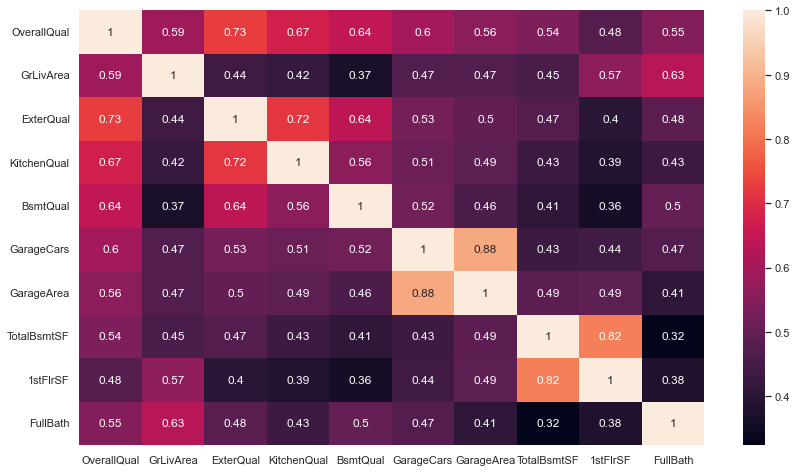

In [121]:
sns.heatmap(train_data[candidate_columns].corr(), annot=True)

In [122]:
candidate_columns += train_data.iloc[: , -8::1].columns.tolist()
candidate_columns

['OverallQual',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'BsmtQual',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl']

In [123]:
test_data['HouseStyle_2.5Fin'] = 0

In [124]:
test_data[candidate_columns].dtypes

OverallQual          float64
GrLivArea            float64
ExterQual            float64
KitchenQual          float64
BsmtQual             float64
GarageCars           float64
GarageArea           float64
TotalBsmtSF          float64
1stFlrSF             float64
FullBath             float64
HouseStyle_1.5Fin      uint8
HouseStyle_1.5Unf      uint8
HouseStyle_1Story      uint8
HouseStyle_2.5Fin      int64
HouseStyle_2.5Unf      uint8
HouseStyle_2Story      uint8
HouseStyle_SFoyer      uint8
HouseStyle_SLvl        uint8
dtype: object

In [125]:
train_data[candidate_columns] = train_data[candidate_columns].astype(np.float32)
test_data[candidate_columns] = test_data[candidate_columns].astype(np.float32)
train_data['SalePrice'] = train_data['SalePrice'].astype(np.float32)

In [126]:
test_data[candidate_columns].dtypes

OverallQual          float32
GrLivArea            float32
ExterQual            float32
KitchenQual          float32
BsmtQual             float32
GarageCars           float32
GarageArea           float32
TotalBsmtSF          float32
1stFlrSF             float32
FullBath             float32
HouseStyle_1.5Fin    float32
HouseStyle_1.5Unf    float32
HouseStyle_1Story    float32
HouseStyle_2.5Fin    float32
HouseStyle_2.5Unf    float32
HouseStyle_2Story    float32
HouseStyle_SFoyer    float32
HouseStyle_SLvl      float32
dtype: object

In [ ]:
net = nn.Sequential(
    nn.Linear(18, 11),
    nn.GELU(),
    nn.Linear(11, 1)
)

In [ ]:
net.to('cuda')

Sequential(
  (0): Linear(in_features=10, out_features=10, bias=True)
  (1): GELU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
mse = nn.MSELoss()
def log_rmse(pred: torch.Tensor, label: torch.Tensor):
    pred = torch.clamp(pred, 1, float('inf'))
    return torch.sqrt(mse(torch.log(pred), torch.log(label)))

In [ ]:
train_dataset = TensorDataset(
    torch.from_numpy(train_data[candidate_columns].values),
    torch.from_numpy(train_data['SalePrice'].values.reshape(-1, 1))
)

In [ ]:
train_dataset.tensors[0].shape

torch.Size([1460, 10])

In [ ]:
def get_loaders():
    train_len = int(k * train_data.shape[0])
    valid_len = train_data.shape[0] - train_len
    train_set, valid_set = random_split(train_dataset, [train_len, valid_len])
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True)
    return train_loader, valid_loader

In [ ]:
def train():
    # 获得训练和验证集的DataLoader
    train_loader, valid_loader = get_loaders()
    optimizer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=weight_decay)

    for epoch in range(num_epochs):
        # 训练
        net.train()
        for x, y in train_loader:
            x, y = x.to('cuda'), y.to('cuda')
            pred = net(x)
            loss = mse(pred, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        train_loss = log_rmse(pred, y).mean().item()

        # 验证
        net.eval()
        loss_sum = 0
        for x, y in valid_loader:
            x, y = x.to('cuda'), y.to('cuda')
            with torch.no_grad():
                pred = net(x)
                loss_sum += log_rmse(pred, y).sum().item()
        valid_loss = loss_sum / len(valid_loader)

        print(f'Epoch: {epoch + 1}, Train Log Loss: {train_loss:.2f}, Valid Log Loss: {valid_loss:.2f}')

In [ ]:
k, lr, weight_decay, batch_size, num_epochs = 0.9, 3, 0, 512, 500

In [ ]:
train()

In [ ]:
def predict():
    net.eval()
    with torch.no_grad():
        pred = net(torch.from_numpy(test_data[candidate_columns].values).to('cuda'))
    submission = pd.DataFrame({
        'Id': test_data['Id'].values,
        'SalePrice': pred.detach().cpu().numpy().reshape(-1)
    })
    submission.to_csv('submission.csv', index=False)
    return submission

In [ ]:
predict()['SalePrice'].isna().sum()

0